In [1]:
import pandas as pd
%matplotlib inline

In [86]:
senti = pd.read_excel('SentimentData.xlsx')

In [3]:
max(senti.ReviewDate)

Timestamp('2016-09-13 16:24:00')

In [4]:
min(senti.ReviewDate)

Timestamp('2015-06-22 00:00:00')

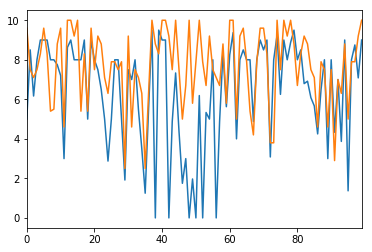

In [5]:
senti['SentimentScore'][:100].plot()
senti['QuantitativeScore'][:100].plot()

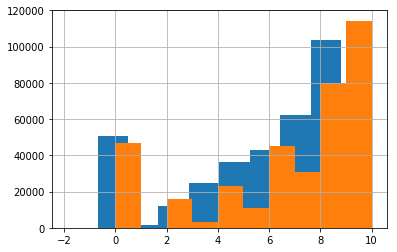

In [6]:
senti['SentimentScore'].sort_values().hist()
senti['QuantitativeScore'].sort_values().hist()

In [87]:
senti.loc[:,'avgScore']=senti.loc[:,['SentimentScore','QuantitativeScore']].mean(axis=1)
senti = senti.loc[senti['subscriptionname'] =='Red Lion Hotel Port Angeles',]
senti = senti.sort_values('ReviewDate',ascending=True)


In [98]:
import numpy as np
sg = senti.groupby('ReviewDate').agg({'avgScore':np.mean})
sg = sg.reset_index().reset_index()
sg['weightedScore'] = sg['avgScore'].multiply(sg['index'])
sg['day_cnt_cs'] = sg['index'].cumsum()
sg = sg.ix[1:]
sg.loc[:,'day_cnt_cs'] = sg.loc[:,'day_cnt_cs'].astype('float')
sg.loc[:,'w_s_cs'] = sg.loc[:,'weightedScore'].cumsum()
sg.loc[:,'vi'] = sg['w_s_cs'].divide(sg['day_cnt_cs'])
sg['vi'].plot()
sg.head()

,index,ReviewDate,avgScore,weightedScore,day_cnt_cs,w_s_cs
1,1,2015-06-23,6.645976,6.645976,1.0,6.645976
2,2,2015-06-24,7.329151,14.658302,3.0,21.304278
3,3,2015-06-25,6.924390,20.773170,6.0,42.077448
4,4,2015-06-26,6.130282,24.521127,10.0,66.598576
5,5,2015-06-27,6.600465,33.002325,15.0,99.600901


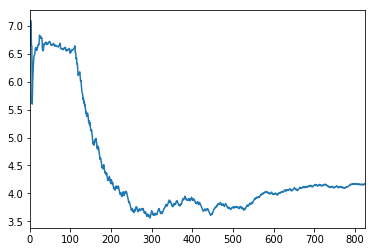